In [2]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
%matplotlib inline

In [3]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

In [4]:
# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
#         result[i] = data[i] - ((right-left)*i/(points-1) + left)
#         result[i] = data[i] - ((right-left)*i/(points-1) - right/2)
        result[i] = data[i] - ((right-left)*i/(points-1))
    
    return result

In [5]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
        # 2次元DCTの基底ベクトルの格納
        self.phi_2d = np.zeros((N,N))
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c,axis=1)
    
    def get_dct2_phi(self,i,j):
        """ 2次元離散コサイン変換の基底を返す """
        phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
        return phi_i*phi_j
    
    def get_dct2(self,i,j,data):
        """ i,jの2次元DCT係数を返す """
        phi_2d_phi = np.zeros((self.N,self.N))
        phi_2d_phi = self.get_dct2_phi(i,j)
        return np.sum(phi_2d_phi.reshape(self.N*self.N)*data.reshape(self.N*self.N))
    
    def dct2(self,data):
        """ 2次元離散コサイン変換を行う """
        for j in tqdm(range(self.N)):
            for i in range(self.N):
                self.phi_2d[i,j] = self.get_dct2(i,j,data)
        
        return self.phi_2d
    
    def idct2(self,c):
        """ 2次元離散コサイン逆変換を行う """
        idct2_data = np.zeros((self.N,self.N))
        phi_2d_phi = np.zeros((self.N,self.N))
        for i in tqdm(range(self.N)):
            for j in range(self.N):
                phi_2d_phi = self.get_dct2_phi(j,i)
                idct2_data += c.reshape((self.N,self.N,1))[j,i]*phi_2d_phi
        
        return idct2_data

In [6]:
# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

# 直線のデータなら

In [6]:
data = np.arange(8)+10
data

array([10, 11, 12, 13, 14, 15, 16, 17])

In [7]:
data_L = Lanczos(data)
data_L

array([10., 10., 10., 10., 10., 10., 10., 10.])

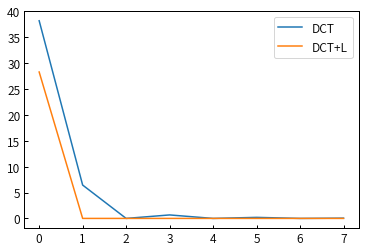

In [8]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

In [9]:
print(c)
print(c_L)

[ 3.81837662e+01 -6.44232302e+00 -4.44089210e-15 -6.73454801e-01
  1.77635684e-15 -2.00902904e-01 -7.10542736e-15 -5.07023228e-02]
[ 2.82842712e+01  1.77635684e-15 -2.66453526e-15  2.22044605e-15
  8.88178420e-16  7.99360578e-15 -5.32907052e-15 -3.55271368e-15]


In [7]:
data = np.linspace(0, 255, 8)
data

array([  0.        ,  36.42857143,  72.85714286, 109.28571429,
       145.71428571, 182.14285714, 218.57142857, 255.        ])

In [10]:
data_L = Lanczos(data)
data_L

array([127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5, 127.5])

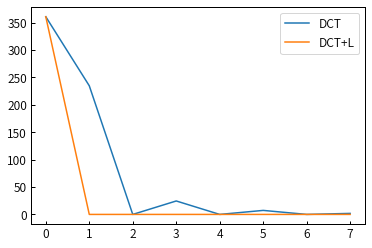

In [11]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

## 高周波が多いデータなら

### 高周波のcos

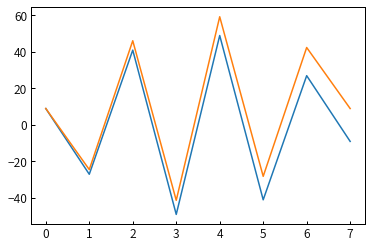

In [58]:
N = 8
k = 7
data = (np.sqrt(2.0/N)*np.cos((k*np.pi/(2*N))*(np.arange(N)*2+1))*100).astype(np.int64)
# data = (np.sqrt(2.0/N)*np.cos((k*np.pi/(2*N))*(np.arange(N)*2+1))*100)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

In [59]:
print(data)
print(data_L)

[  9 -27  41 -49  49 -41  27  -9]
[  9.         -24.42857143  46.14285714 -41.28571429  59.28571429
 -28.14285714  42.42857143   9.        ]


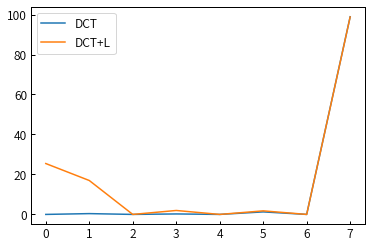

In [23]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

In [24]:
print(c)
print(c_L)

[ 0.00000000e+00 -4.03658234e-01  1.06581410e-14 -2.38589873e-01
 -3.55271368e-15 -1.26197313e+00 -1.24344979e-14  9.89049420e+01]
[ 2.54558441e+01 -1.69696317e+01  1.06581410e-14 -1.97033079e+00
 -1.06581410e-14 -1.77858060e+00 -1.86517468e-14  9.87745646e+01]


お？

### 矩形波

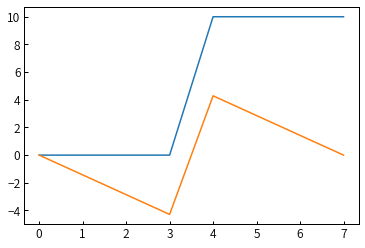

In [36]:
N = 8
data = np.array([0,0,0,0,10,10,10,10])
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

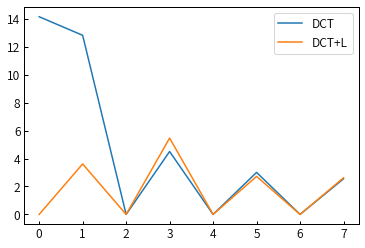

In [37]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

？

## 係数から信号を作ってみる

### ランプ

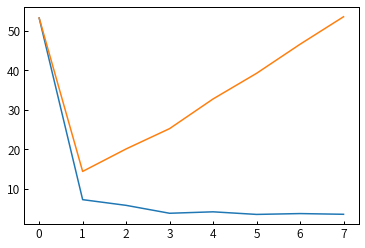

In [60]:
dct = DCT(8)
# c = np.array([10,9,8,7,6,5,4,3])
c = np.linspace(30, 5, 8)
data = dct.idct(c)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

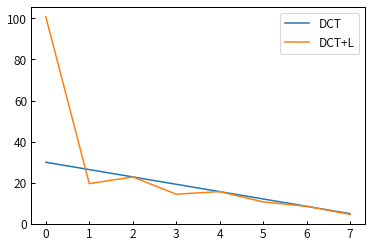

In [61]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

### ステップ

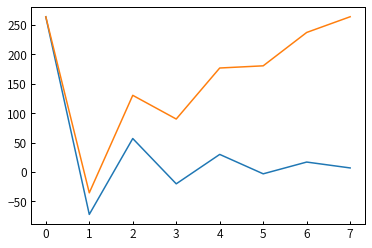

In [65]:
dct = DCT(8)
c = np.full(8,1)
data = 100*dct.idct(c)
data = data.astype(np.int64)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

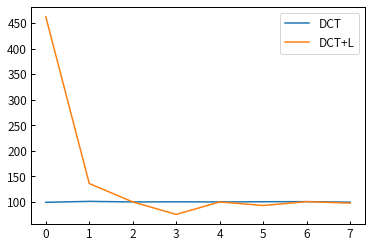

In [66]:
dct = DCT(8)
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

# 偶数番目の周波数

周期化したときに、連続につながる信号なので
その信号のみの足し合わせで表現された信号はランチョスする意味がない。
そりゃそうだ、考えればわかる
奇数番目の信号と偶数番目の信号の足し合わせをランチョスしたとしても、結局は奇数番目しか小さくならない
何故だ？形は変わるだろうに...

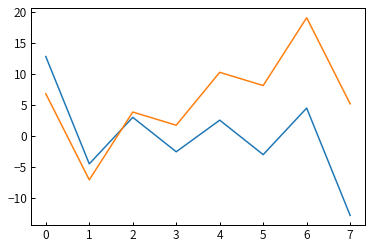

In [6]:
dct = DCT(8)
c = np.array([0,10,0,10,0,10,0,10])
data = dct.idct(c)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

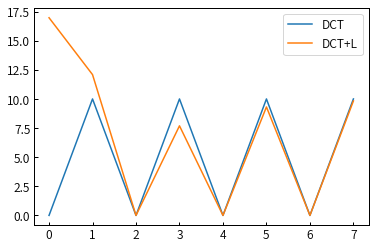

In [7]:
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

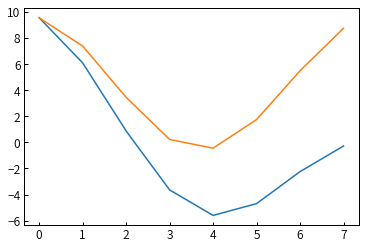

In [8]:
dct = DCT(8)
c = np.array([0,10,10,0,0,0,0,0])
data = dct.idct(c)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

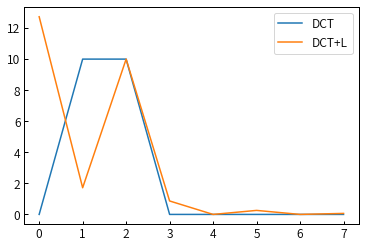

In [10]:
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

In [11]:
print(c)
print(c_L)

[-4.44089210e-16  1.00000000e+01  1.00000000e+01  4.44089210e-16
 -2.44249065e-15  0.00000000e+00  0.00000000e+00  2.22044605e-15]
[ 1.27279221e+01  1.71701326e+00  1.00000000e+01 -8.65870458e-01
 -2.66453526e-15 -2.58303733e-01 -1.33226763e-15 -6.51887007e-02]


In [14]:
c = np.array([1.27279221e+01,  1.71701326e+00,  1.00000000e+01, -8.65870458e-01,0,0,0,0])

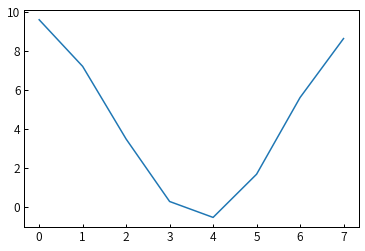

In [15]:
data = dct.idct(c)
plt.plot(data)

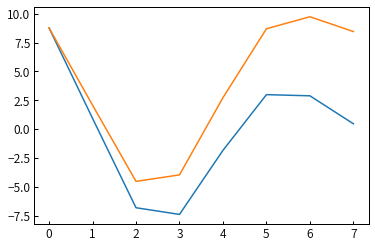

In [16]:
dct = DCT(8)
c = np.array([0,0,10,10,0,0,0,0])
data = dct.idct(c)
data_L = Lanczos(data)
plt.plot(data)
plt.plot(data_L)

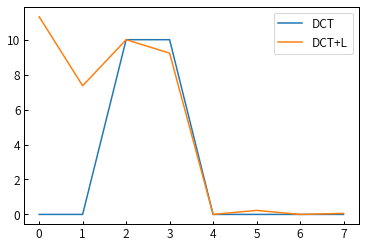

In [17]:
c = dct.dct(data)
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

？

k 0
data [3.53553391 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391]
data_L [3.53553391 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391]
c [ 1.00000000e+01  5.55111512e-16 -1.06654704e-15  6.66133815e-16
  0.00000000e+00  2.88657986e-15 -1.95472546e-15 -8.88178420e-16]
c_L [ 1.00000000e+01  5.55111512e-16 -1.06654704e-15  6.66133815e-16
  0.00000000e+00  2.88657986e-15 -1.95472546e-15 -8.88178420e-16]


k 1
data [ 4.9039264   4.15734806  2.77785117  0.97545161 -0.97545161 -2.77785117
 -4.15734806 -4.9039264 ]
data_L [4.9039264  5.3002052  5.06356545 4.40402304 3.59597696 2.93643455
 2.6997948  3.0960736 ]
c [ 6.66133815e-16  1.00000000e+01  6.66133815e-16 -4.44089210e-16
  0.00000000e+00 -2.66453526e-15  0.00000000e+00  1.96203061e-15]
c_L [ 1.13137085e+01  2.63734512e+00 -1.49880108e-15 -7.69662630e-01
  0.00000000e+00 -2.29603319e-01 -1.33226763e-15 -5.79455117e-02]


k 2
data [ 4.61939766  1.91341716 -1.91341716 -4.6193976

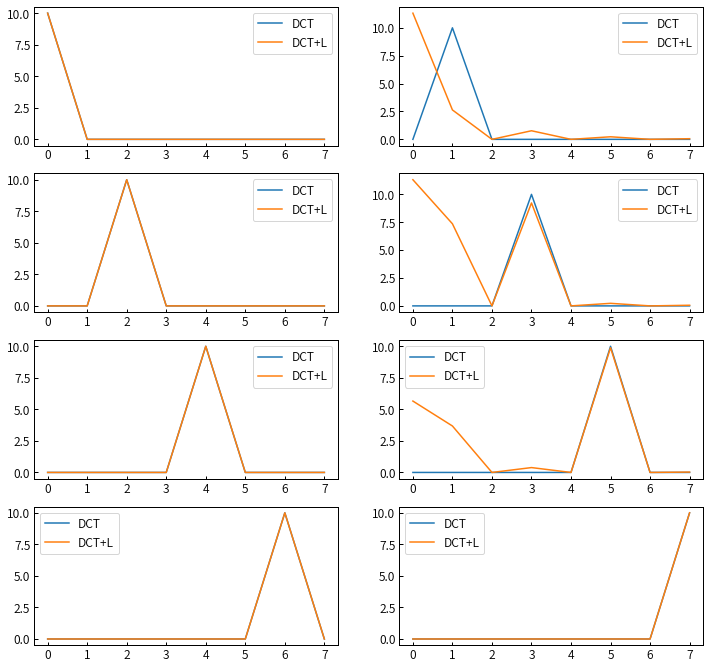

In [28]:
plt.figure(figsize=(12,24))
dct = DCT(8)
c = np.array([0,0,0,0,0,0,0,0])
plot_num = 7
for k in range(0,plot_num + 1):
    c = np.array([0,0,0,0,0,0,0,0])
    c[k] = 10
    plt.subplot(plot_num+1,2,k+1)
    
    data = dct.idct(c)
    data_L = Lanczos(data)

    c = dct.dct(data)
    c_L = dct.dct(data_L)
    plt.plot(np.abs(c),label="DCT")
    plt.plot(np.abs(c_L),label="DCT+L")
    plt.legend()
    
    print("k",k)
    print("data",data)
    print("data_L",data_L)
    print("c",c)
    print("c_L",c_L)
    print("\n")

ランチョスで変わるのこれくらいなんだが
高周波小さくならへんくない！？

k 0
data [3.53553391 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391]
data_L [3.53553391 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391]
c [10.  0.  0.  0.  0.  0.  0.  0.]
c_L [10.  0.  0.  0.  0.  0.  0.  0.]


k 1
data [ 4.9039264   4.15734806  2.77785117  0.97545161 -0.97545161 -2.77785117
 -4.15734806 -4.9039264 ]
data_L [4.9039264  5.3002052  5.06356545 4.40402304 3.59597696 2.93643455
 2.6997948  3.0960736 ]
c [ 0.00000000e+00  1.00000000e+01  0.00000000e+00  9.23954143e-16
  0.00000000e+00 -1.83785906e-16  0.00000000e+00 -8.88178420e-16]
c_L [ 1.13137085e+01  2.63734512e+00 -2.54918375e-16 -7.69662630e-01
  0.00000000e+00 -2.29603319e-01  6.15427397e-16 -5.79455117e-02]


k 2
data [ 4.61939766  1.91341716 -1.91341716 -4.61939766 -4.61939766 -1.91341716
  1.91341716  4.61939766]
data_L [ 4.61939766  1.91341716 -1.91341716 -4.61939766 -4.61939766 -1.91341716
  1.91341716  4.61939766]
c [ 0.  0. 10.  0.  0.  0.  0.  0.]


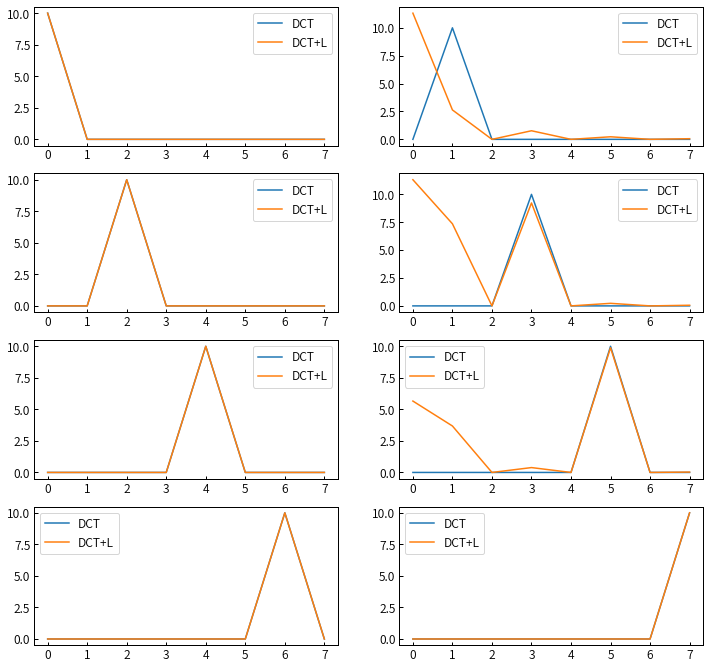

In [21]:
plt.figure(figsize=(12,24))
dct = DCT(8)
c = np.array([0,0,0,0,0,0,0,0])
plot_num = 7
for k in range(0,plot_num + 1):
    c = np.array([0,0,0,0,0,0,0,0])
    c[k] = 10
    plt.subplot(plot_num+1,2,k+1)
    
    data = scipy.fftpack.idct(c,norm='ortho') 
    data_L = Lanczos(data)

    c = scipy.fftpack.dct(data,norm='ortho')
    c_L = scipy.fftpack.dct(data_L,norm='ortho')
    plt.plot(np.abs(c),label="DCT")
    plt.plot(np.abs(c_L),label="DCT+L")
    plt.legend()
    
    print("k",k)
    print("data",data)
    print("data_L",data_L)
    print("c",c)
    print("c_L",c_L)
    print("\n")

# 逆にずらしてみたらどうなるん？

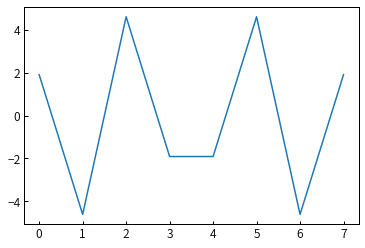

In [22]:
dct = DCT(8)
c = np.array([0,0,0,0,0,0,10,0])
data = dct.idct(c)
plt.plot(data)

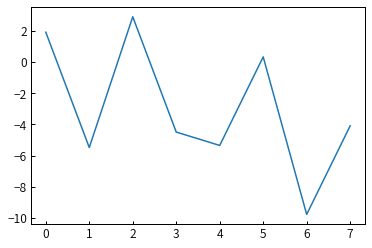

In [36]:
points = 8
data_L = np.zeros(points)
right = 3
left = -3
for i in range(points):
    data_L[i] = data[i] - ((right-left)*i/(points-1))

plt.plot(data_L)

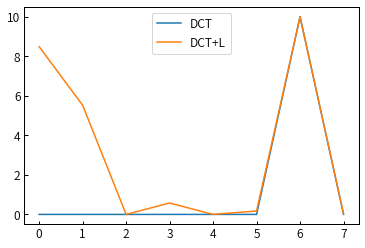

In [37]:
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

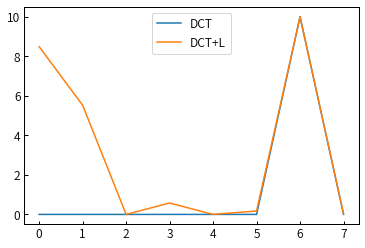

In [24]:
c = scipy.fftpack.dct(data,norm='ortho')
c_L = scipy.fftpack.dct(data_L,norm='ortho')
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

In [33]:
print(c[6])
print(c_L[6])

10.0
10.000000000000005


直線の信号との残渣を取った信号をDCTしても、周波数成分に変化がない

In [38]:
power = sum(np.power(data,2))
power

99.99999999999999

In [39]:
power = sum(np.power(c,2))
power

100.0

In [40]:
power = sum(np.power(data_L,2))
power

202.8571428571429

In [41]:
power = sum(np.power(c_L,2))
power

202.8571428571429

# 直線じゃなくて、交流でずらしてみたらどうなるん？

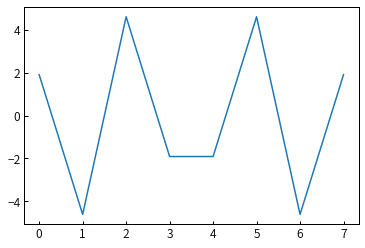

In [149]:
dct = DCT(8)
c = np.array([0,0,0,0,0,0,10,0])
data = dct.idct(c)
plt.plot(data)

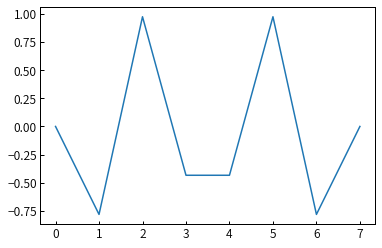

In [165]:
points = 8
freq = 4.5
sin_data = np.zeros(points)
for T in range(8):
    sin_data[T] = np.sin(freq*2*np.pi*T/(points-1))
    
plt.plot(sin_data)

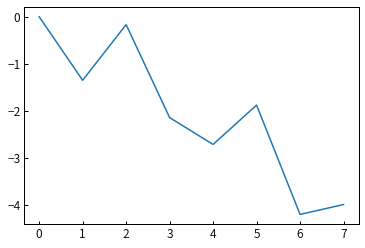

In [170]:
points = 8
sin_ddata = np.zeros(points)
right = 2
left = -2
for i in range(points):
    sin_ddata[i] = sin_data[i] - ((right-left)*i/(points-1))

plt.plot(sin_ddata)

In [162]:
# 1つ目

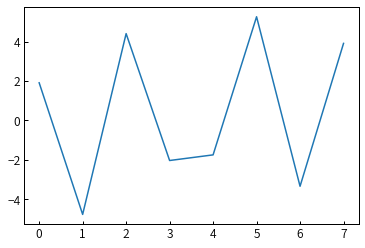

In [163]:
data_L = np.zeros(points)
for i in range(points):
    data_L[i] = data[i] - sin_ddata[i]
    
plt.plot(data_L)

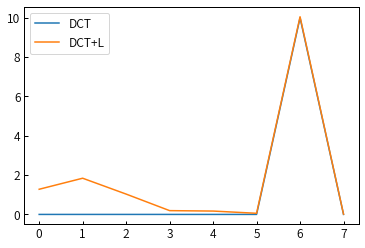

In [164]:
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()

2つ目が変化した？

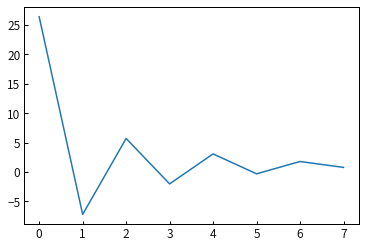

In [171]:
# 2つ目
dct = DCT(8)
c = np.array([10,10,10,10,10,10,10,10])
data = dct.idct(c)
plt.plot(data)

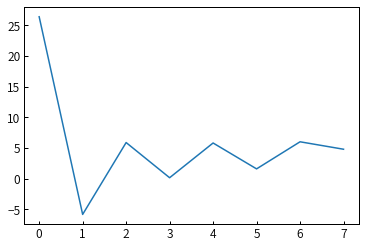

In [172]:
data_L = np.zeros(points)
for i in range(points):
    data_L[i] = data[i] - sin_ddata[i]
    
plt.plot(data_L)

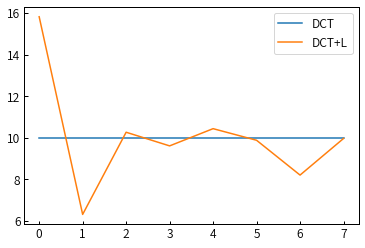

In [173]:
c_L = dct.dct(data_L)
plt.plot(np.abs(c),label="DCT")
plt.plot(np.abs(c_L),label="DCT+L")
plt.legend()